In [130]:
# Install necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree

In [131]:
# Load the dataset
# Replace the dataset name and file type accordingly
df = pd.read_csv(r'C:\Users\yekta\Desktop\dataset.csv')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

In [133]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'ID'], axis=1)

In [134]:
df = df.dropna()

In [135]:
df.isnull().sum()

AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            0
MWT2            0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [136]:
# Examine the dataset
print(df.head())

   AGE  PackHistory COPDSEVERITY   MWT1   MWT2  MWT1Best  FEV1  FEV1PRED  \
0   77         60.0       SEVERE  120.0  120.0     120.0  1.21      36.0   
1   79         50.0     MODERATE  165.0  176.0     176.0  1.09      56.0   
2   80         11.0     MODERATE  201.0  180.0     201.0  1.52      68.0   
3   56         60.0  VERY SEVERE  210.0  210.0     210.0  0.47      14.0   
4   65         68.0       SEVERE  204.0  210.0     210.0  1.07      42.0   

    FVC  FVCPRED  ...   SGRQ  AGEquartiles  copd  gender  smoking  Diabetes  \
0  2.40       98  ...  69.55             4     3       1        2         1   
1  1.64       65  ...  44.24             4     2       0        2         1   
2  2.30       86  ...  44.09             4     2       0        2         1   
3  1.14       27  ...  62.04             1     4       1        2         0   
4  2.91       98  ...  75.56             1     3       1        2         0   

   muscular  hypertension  AtrialFib  IHD  
0         0             

In [137]:
df.describe()

,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,70.121212,39.803030,385.858586,389.797980,398.717172,1.603131,58.400808,2.957778,86.343434,19.404040,...,40.169596,2.474747,2.202020,0.636364,1.838384,0.212121,0.191919,0.111111,0.202020,0.090909
std,7.873065,24.623162,104.744199,108.194456,107.019552,0.676037,22.446883,0.979259,21.934114,18.856017,...,18.359603,1.100496,0.891911,0.483494,0.369972,0.410891,0.395814,0.315869,0.403551,0.288943
min,44.000000,1.000000,120.000000,120.000000,120.000000,0.450000,3.290000,1.140000,27.000000,3.000000,...,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.500000,21.500000,300.000000,302.500000,302.500000,1.095000,42.000000,2.275000,71.000000,12.000000,...,28.370000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,36.000000,419.000000,399.000000,420.000000,1.600000,60.000000,2.770000,84.000000,18.000000,...,38.210000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,52.500000,460.500000,459.000000,465.500000,1.945000,75.000000,3.630000,103.500000,24.000000,...,55.395000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,109.000000,688.000000,699.000000,699.000000,3.180000,102.000000,5.370000,132.000000,188.000000,...,77.440000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
# Create a subset dataframe consisting of numerical columns
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

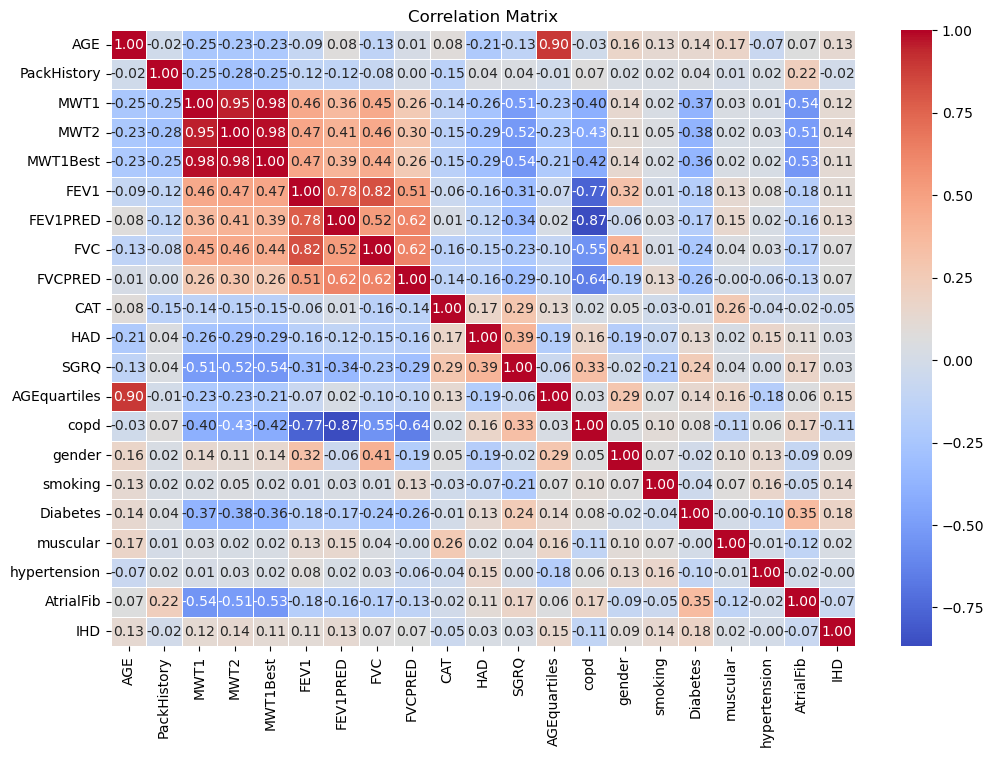

In [139]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [140]:
from sklearn.impute import SimpleImputer

# Select numerical columns
numeric_columns = df.select_dtypes(include='number').columns

# Apply SimpleImputer to numerical columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [141]:
# Convert categorical variables to numerical format
label_encoder = LabelEncoder()
df['COPDSEVERITY'] = label_encoder.fit_transform(df['COPDSEVERITY'])

In [142]:
# Separate independent variables and the target variable
X = df.drop('COPDSEVERITY', axis=1)
y = df['COPDSEVERITY']

In [143]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Cross-validation 
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Results
print("Random Forest Cross-Validation Scores:")
print(rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores:
[0.9        1.         1.         1.         0.94736842]
Mean Accuracy: 0.9694736842105263


In [147]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
# ANN model and training
ann_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
ann_model.fit(X_train, y_train)

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(random_state=42))])

In [149]:
# Cross-validation
ann_cv_scores = cross_val_score(ann_model, X_scaled, y, cv=5, scoring='accuracy')

#Results
print("Artificial Neural Network Cross-Validation Scores:")
print(ann_cv_scores)
print("Mean Accuracy:", ann_cv_scores.mean())

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Artificial Neural Network Cross-Validation Scores:
[0.5        0.55       0.75       0.95       0.68421053]
Mean Accuracy: 0.6868421052631579


C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [150]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
ann_predictions = ann_model.predict(X_test)

In [151]:
# Model perform
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, rf_predictions, average='weighted'))

print("\nANN Metrics:")
print("Accuracy:", accuracy_score(y_test, ann_predictions))
print("Recall:", recall_score(y_test, ann_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, ann_predictions, average='weighted'))


Random Forest Metrics:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0

ANN Metrics:
Accuracy: 0.9
Recall: 0.9
F1 Score: 0.8981372549019608


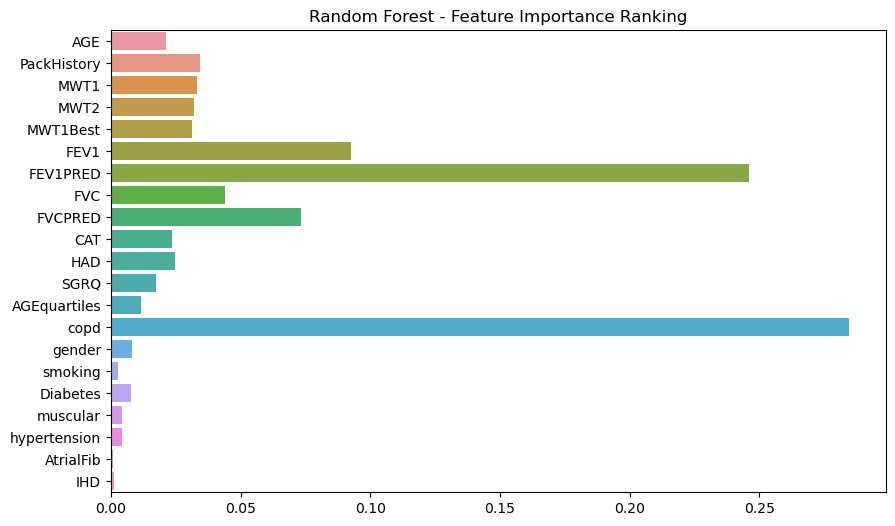

In [152]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importance ranking
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, orient='h')
plt.title('Random Forest - Feature Importance Ranking')
plt.show()

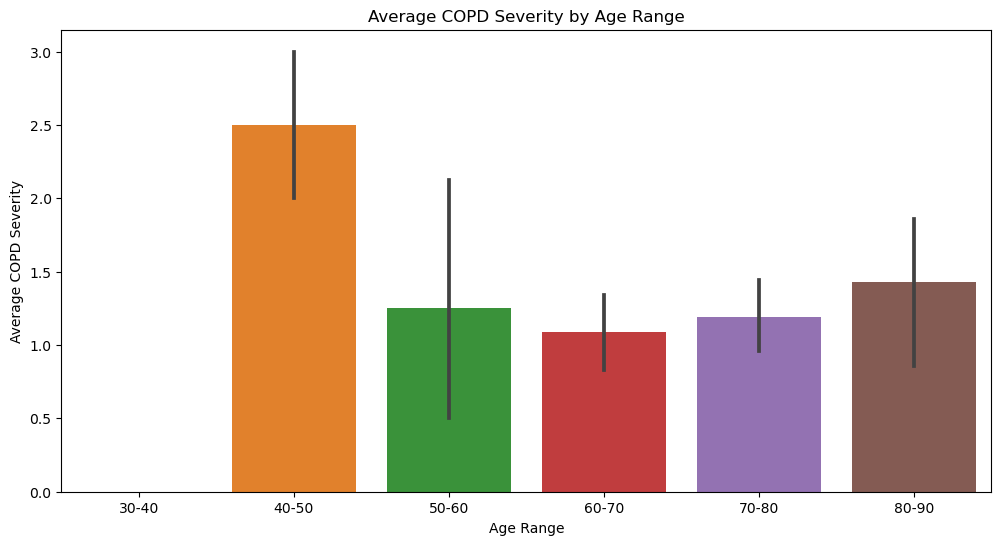

In [153]:
# Categorize ages into specific intervals
df['AGE_Category'] = pd.cut(df['AGE'], bins=[30, 40, 50, 60, 70, 80, 90], labels=['30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

# Draw a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='AGE_Category', y='COPDSEVERITY', data=df)
plt.title('Average COPD Severity by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average COPD Severity')
plt.show()


In [154]:
abbreviations = {
    'MWT1': '6-minute walk test 1',
    'MWT2': '6-minute walk test 2',
    'FEV1': 'Forced Expiratory Volume in 1 second',
    'FVC': 'Forced Vital Capacity',
    'CAT': 'COPD Assessment Test',
    'HAD': 'Hospital Anxiety and Depression Scale',
    'SGRQ': 'St. George Respiratory Questionnaire',
    'IHD': 'Ischemic Heart Disease'
}

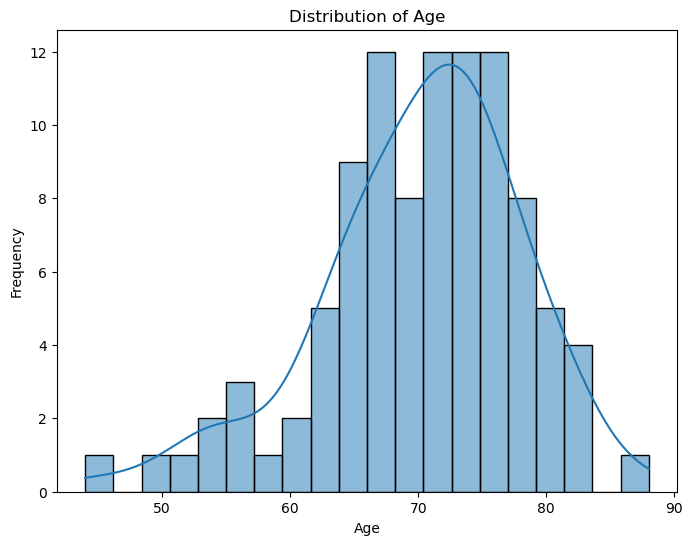

In [155]:
# Plots
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

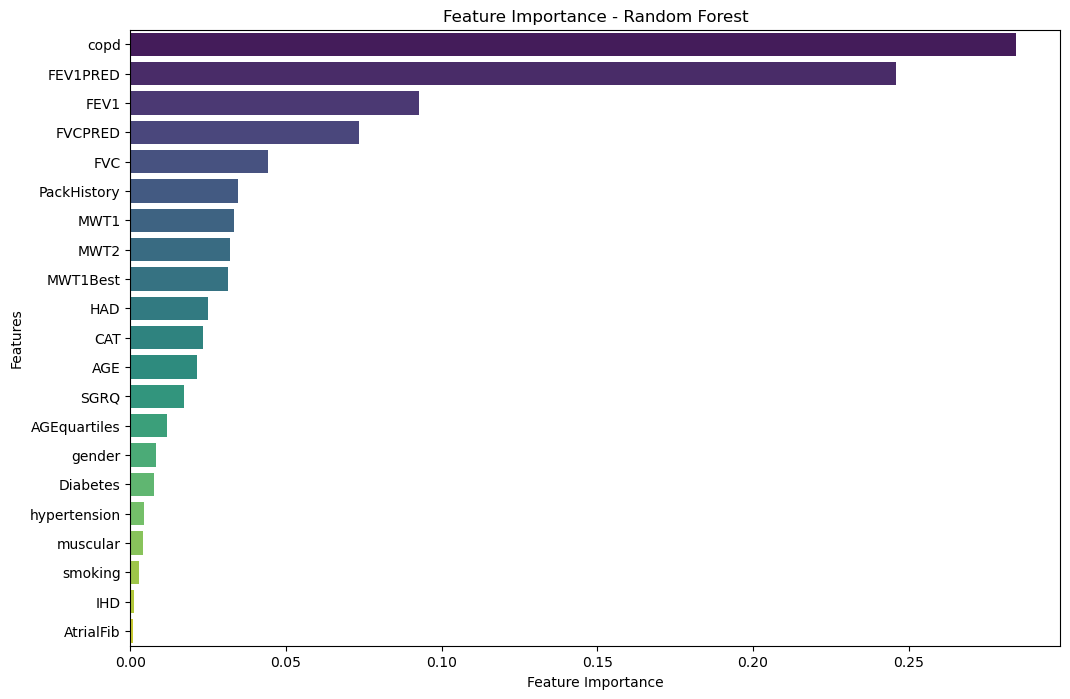

In [156]:
# Visualize the feature importance ranking of the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [157]:
# Examine detailed prediction results of Random Forest and ANN models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

print("\nANN Classification Report:")
print(classification_report(y_test, ann_predictions, target_names=label_encoder.classes_))



Random Forest Classification Report:
              precision    recall  f1-score   support

        MILD       1.00      1.00      1.00         3
    MODERATE       1.00      1.00      1.00         8
      SEVERE       1.00      1.00      1.00         7
 VERY SEVERE       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


ANN Classification Report:
              precision    recall  f1-score   support

        MILD       1.00      1.00      1.00         3
    MODERATE       0.89      1.00      0.94         8
      SEVERE       1.00      0.71      0.83         7
 VERY SEVERE       0.67      1.00      0.80         2

    accuracy                           0.90        20
   macro avg       0.89      0.93      0.89        20
weighted avg       0.92      0.90      0.90        20



In [158]:
# Logistig Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [159]:
# LR prediction
logreg_predictions = logreg_model.predict(X_test)

In [160]:
# LR Preform
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Recall:", recall_score(y_test, logreg_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, logreg_predictions, average='weighted'))

# LR Classification
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions, target_names=label_encoder.classes_))


Logistic Regression Metrics:
Accuracy: 0.9
Recall: 0.9
F1 Score: 0.8931372549019608

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        MILD       1.00      1.00      1.00         3
    MODERATE       0.89      1.00      0.94         8
      SEVERE       0.86      0.86      0.86         7
 VERY SEVERE       1.00      0.50      0.67         2

    accuracy                           0.90        20
   macro avg       0.94      0.84      0.87        20
weighted avg       0.91      0.90      0.89        20



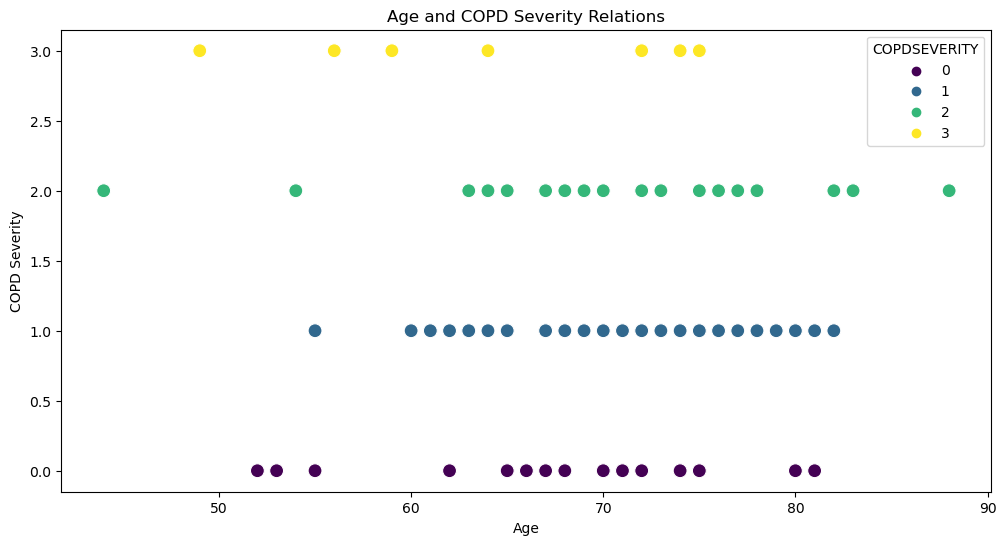

In [161]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AGE', y='COPDSEVERITY', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Age and COPD Severity Relations')
plt.xlabel('Age')
plt.ylabel('COPD Severity')
plt.show()


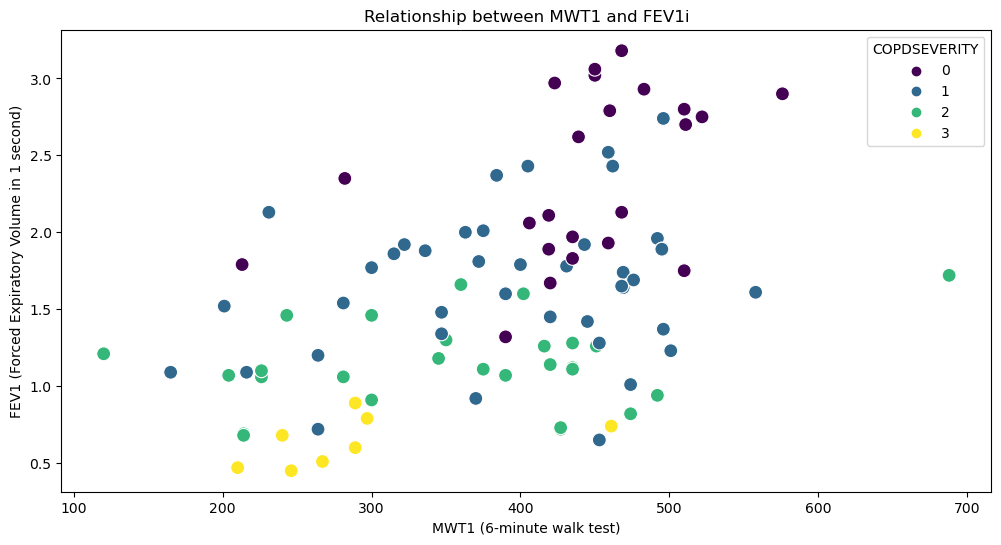

In [162]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MWT1', y='FEV1', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between MWT1 and FEV1i')
plt.xlabel('MWT1 (6-minute walk test)')
plt.ylabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.show()


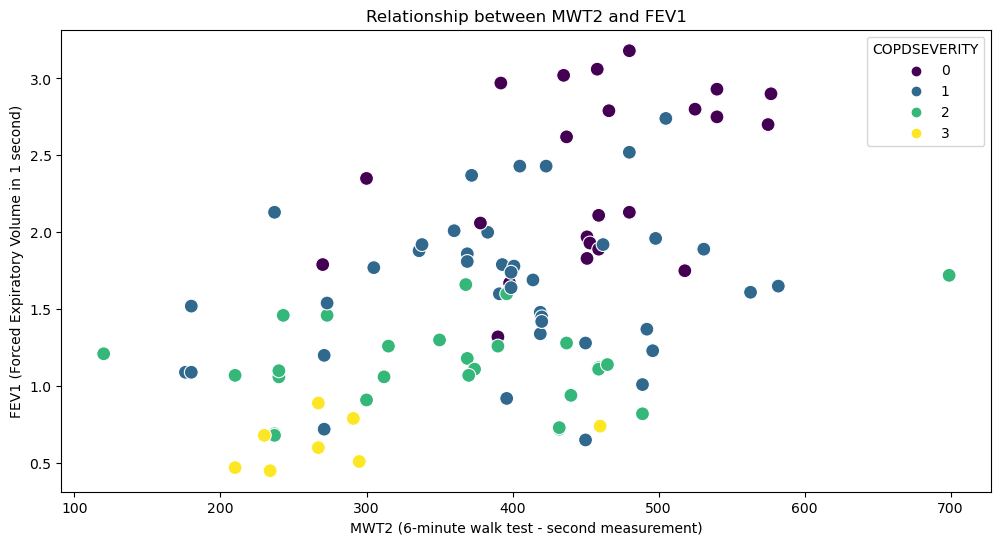

In [163]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MWT2', y='FEV1', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between MWT2 and FEV1')
plt.xlabel('MWT2 (6-minute walk test - second measurement)')
plt.ylabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.show()

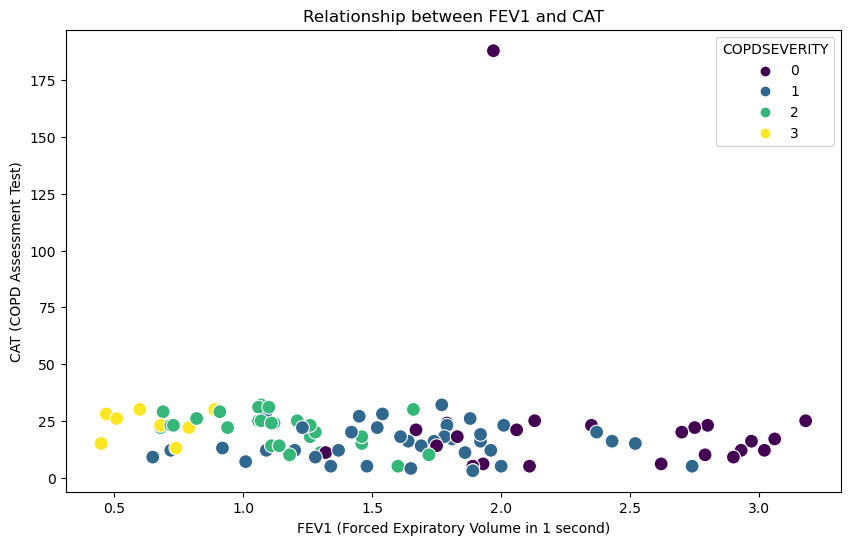

In [164]:
# Relationship between FEV1 and CAT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FEV1', y='CAT', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between FEV1 and CAT')
plt.xlabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.ylabel('CAT (COPD Assessment Test)')
plt.show()

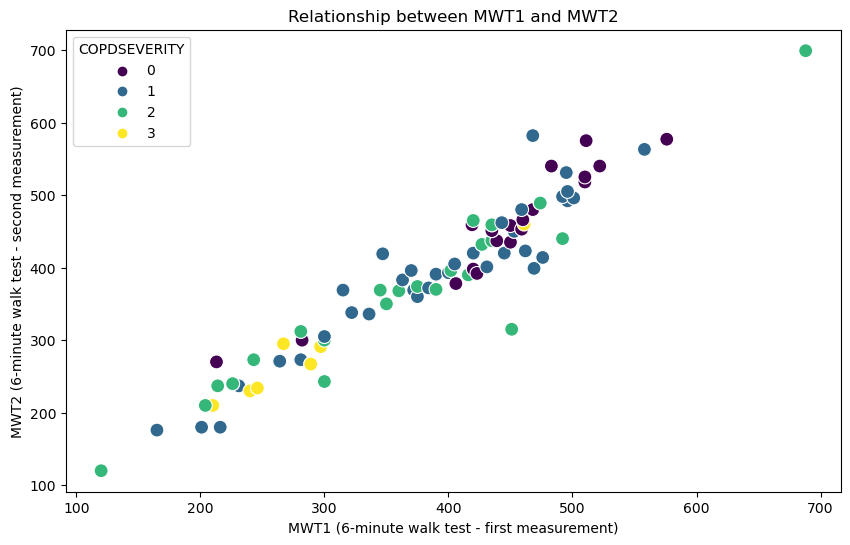

In [165]:
# Relationship between MWT1 and MWT2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MWT1', y='MWT2', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between MWT1 and MWT2')
plt.xlabel('MWT1 (6-minute walk test - first measurement)')
plt.ylabel('MWT2 (6-minute walk test - second measurement)')
plt.show()


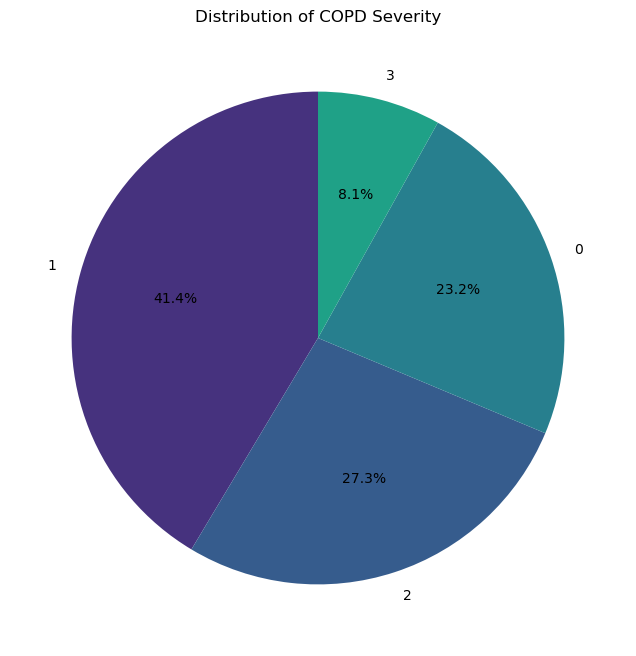

In [166]:
# Distribution of COPD Severity
severity_distribution = df['COPDSEVERITY'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(severity_distribution, labels=severity_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of COPD Severity')
plt.show()

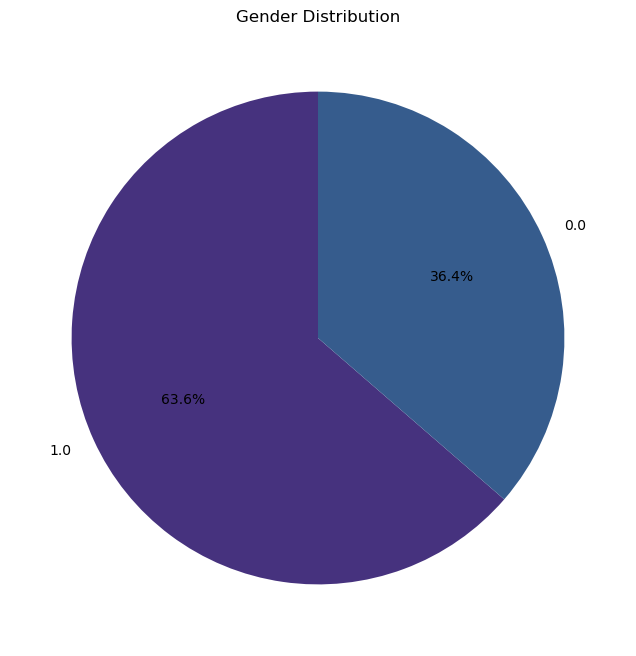

In [167]:
# Gender Distribution
gender_distribution = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Gender Distribution')
plt.show()

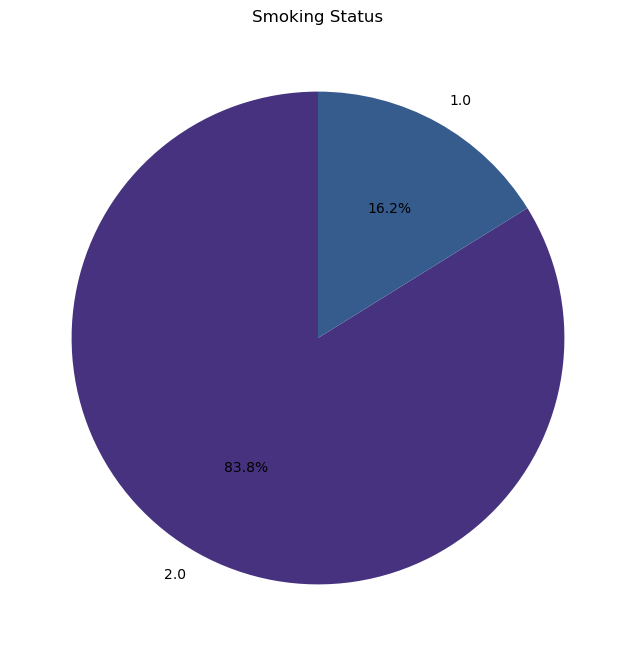

In [168]:
# Smoking Status
smoking_distribution = df['smoking'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(smoking_distribution, labels=smoking_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Smoking Status')
plt.show()


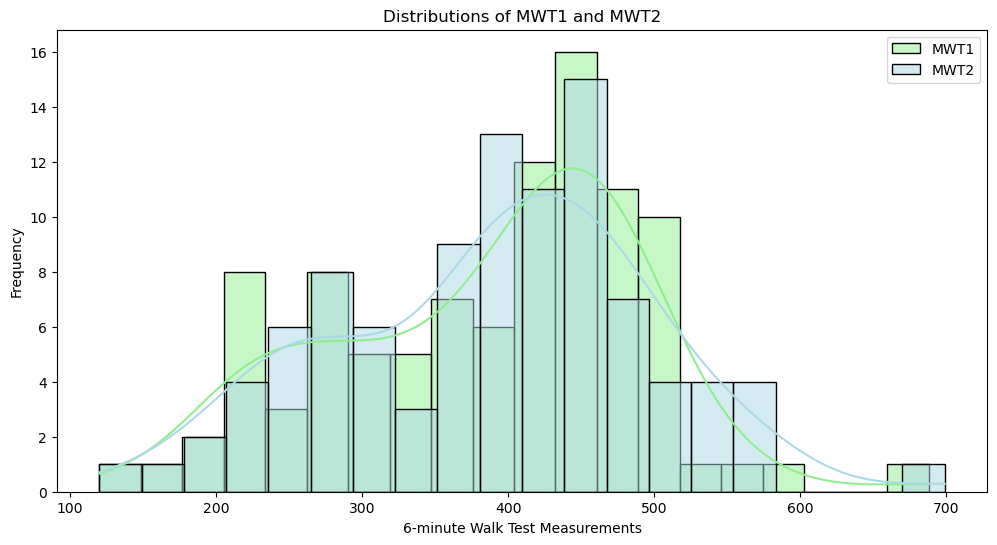

In [169]:
# Distributions of MWT1 and MWT2
plt.figure(figsize=(12, 6))
sns.histplot(df['MWT1'], bins=20, kde=True, color='lightgreen', label='MWT1')
sns.histplot(df['MWT2'], bins=20, kde=True, color='lightblue', label='MWT2')
plt.title('Distributions of MWT1 and MWT2')
plt.xlabel('6-minute Walk Test Measurements')
plt.ylabel('Frequency')
plt.legend()
plt.show()

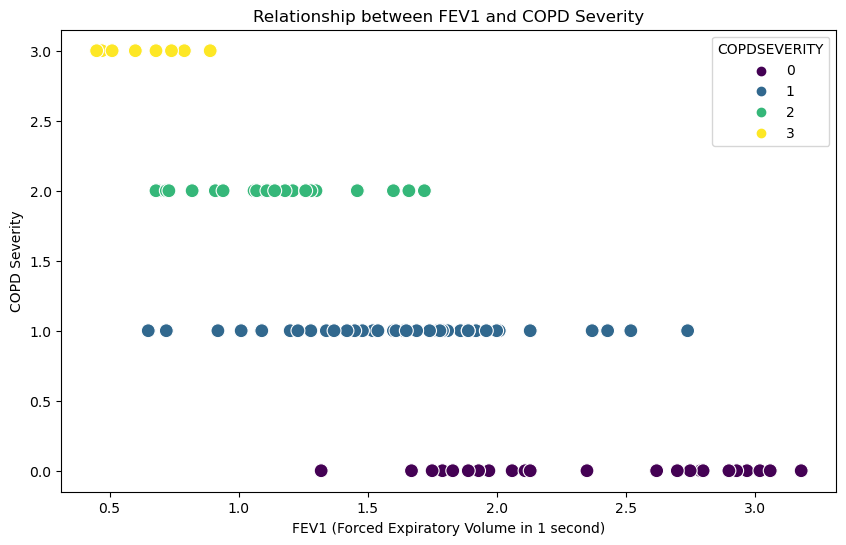

In [170]:
# Relationship between FEV1 and COPD Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FEV1', y='COPDSEVERITY', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between FEV1 and COPD Severity')
plt.xlabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.ylabel('COPD Severity')
plt.show()


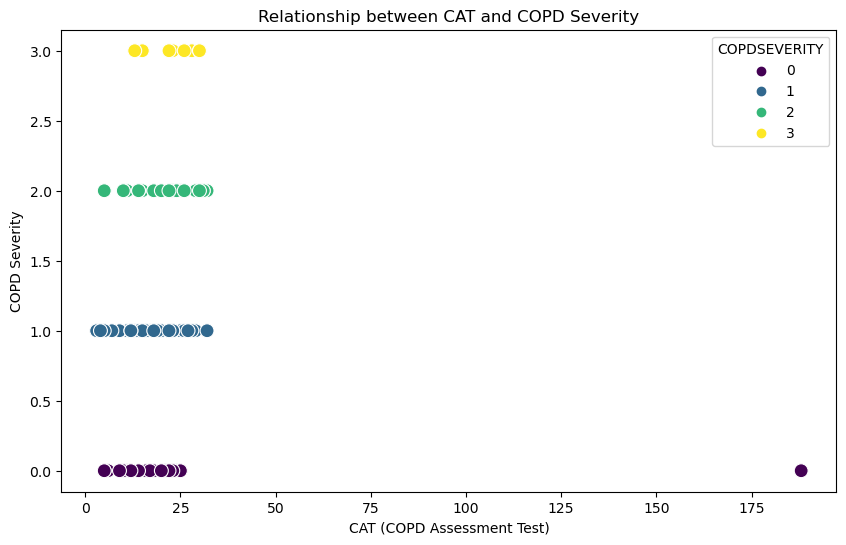

In [171]:
# Relationship between CAT and COPD Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CAT', y='COPDSEVERITY', data=df, hue='COPDSEVERITY', palette='viridis', s=100)
plt.title('Relationship between CAT and COPD Severity')
plt.xlabel('CAT (COPD Assessment Test)')
plt.ylabel('COPD Severity')
plt.show()

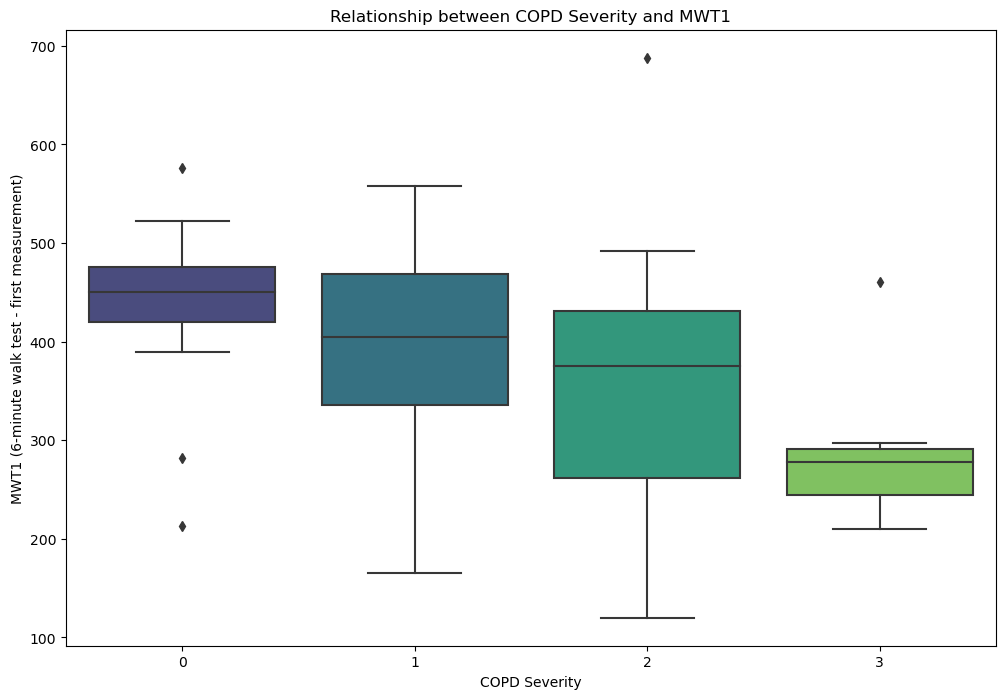

In [172]:
# Relationship between COPD Severity and MWT1
plt.figure(figsize=(12, 8))
sns.boxplot(x='COPDSEVERITY', y='MWT1', data=df, palette='viridis')
plt.title('Relationship between COPD Severity and MWT1')
plt.xlabel('COPD Severity')
plt.ylabel('MWT1 (6-minute walk test - first measurement)')
plt.show()

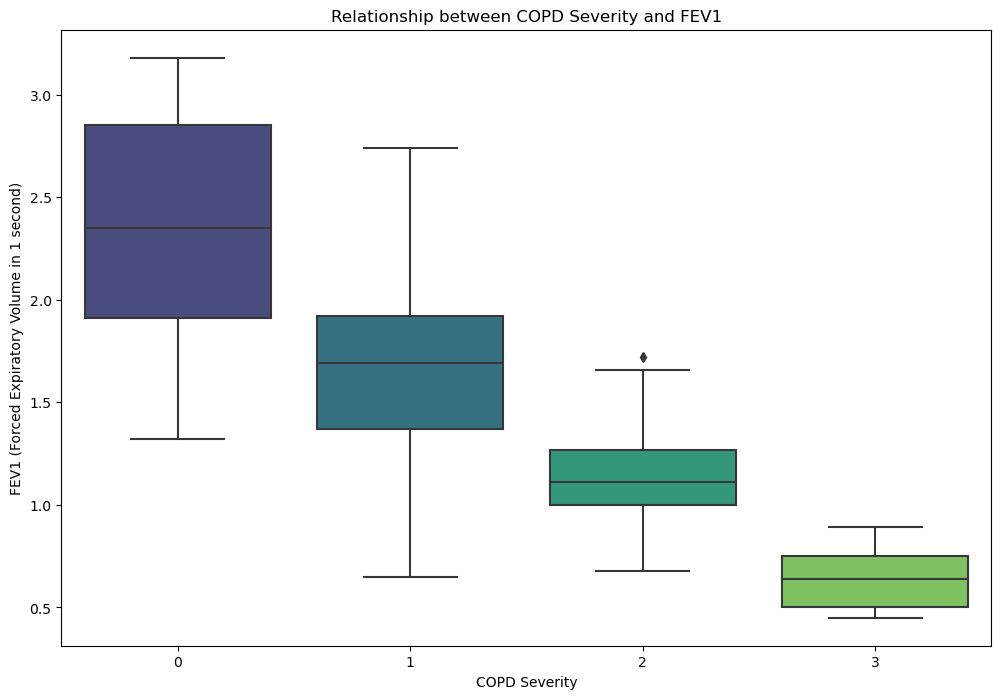

In [173]:
# Relationship between COPD Severity and FEV1
plt.figure(figsize=(12, 8))
sns.boxplot(x='COPDSEVERITY', y='FEV1', data=df, palette='viridis')
plt.title('Relationship between COPD Severity and FEV1')
plt.xlabel('COPD Severity')
plt.ylabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.show()



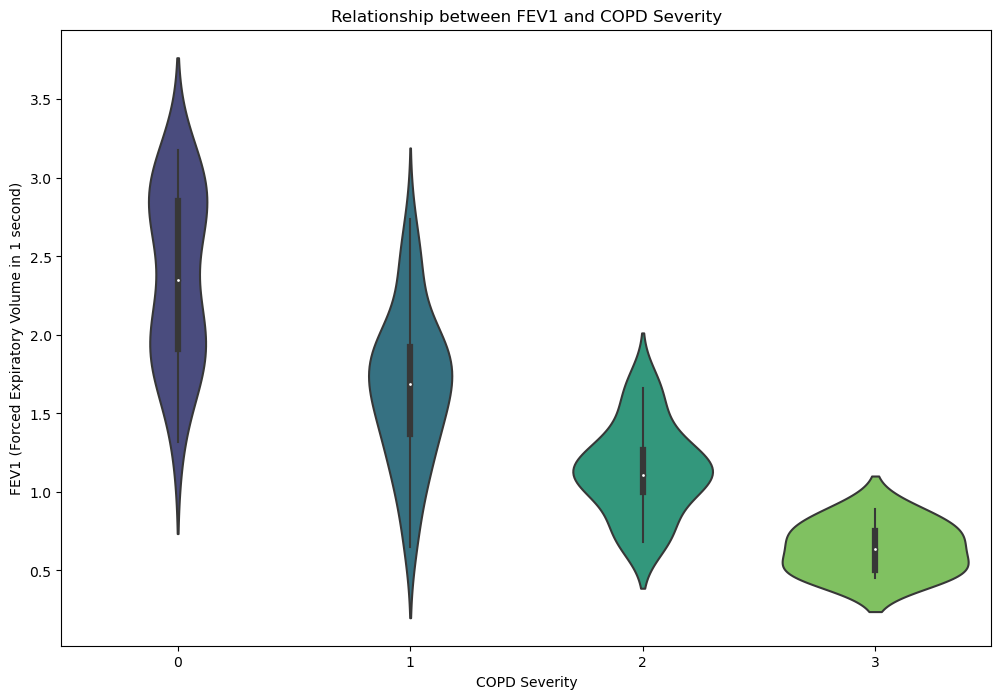

In [174]:
# Relationship between FEV1 and COPD Severity - Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='COPDSEVERITY', y='FEV1', data=df, palette='viridis')
plt.title('Relationship between FEV1 and COPD Severity')
plt.xlabel('COPD Severity')
plt.ylabel('FEV1 (Forced Expiratory Volume in 1 second)')
plt.show()



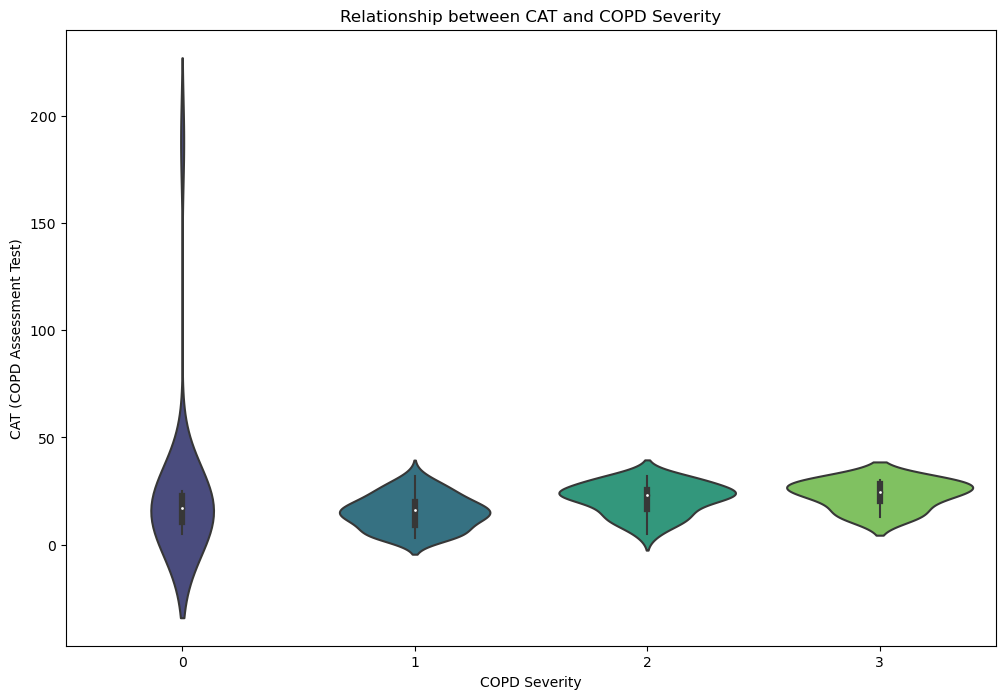

In [175]:
# Relationship between CAT and COPD Severity - Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='COPDSEVERITY', y='CAT', data=df, palette='viridis')
plt.title('Relationship between CAT and COPD Severity')
plt.xlabel('COPD Severity')
plt.ylabel('CAT (COPD Assessment Test)')
plt.show()


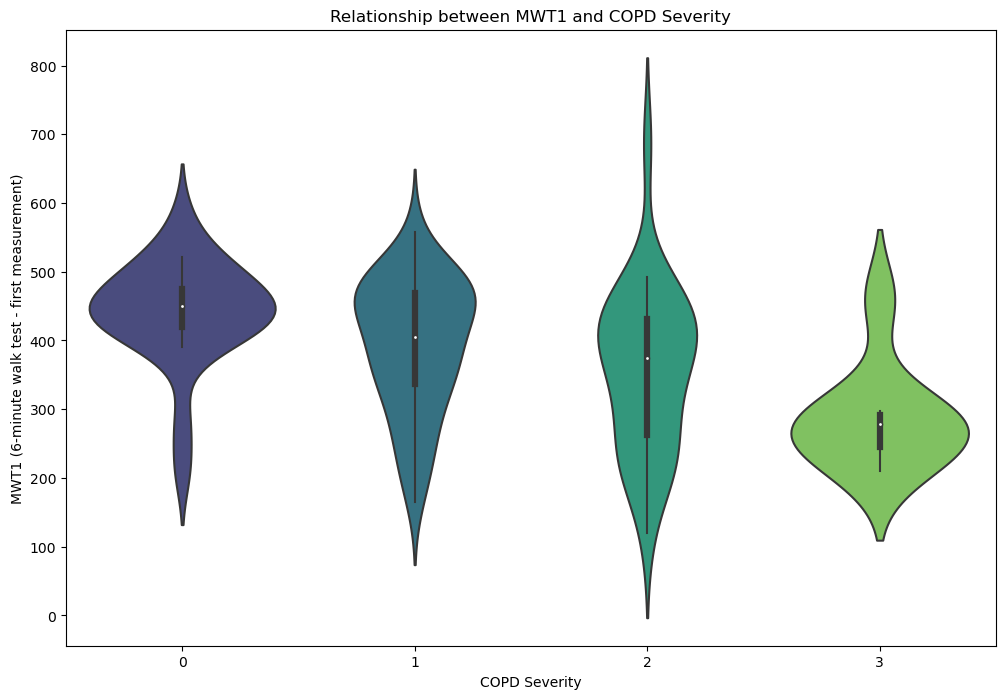

In [176]:
# Relationship between MWT1 and COPD Severity - Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='COPDSEVERITY', y='MWT1', data=df, palette='viridis')
plt.title('Relationship between MWT1 and COPD Severity')
plt.xlabel('COPD Severity')
plt.ylabel('MWT1 (6-minute walk test - first measurement)')
plt.show()


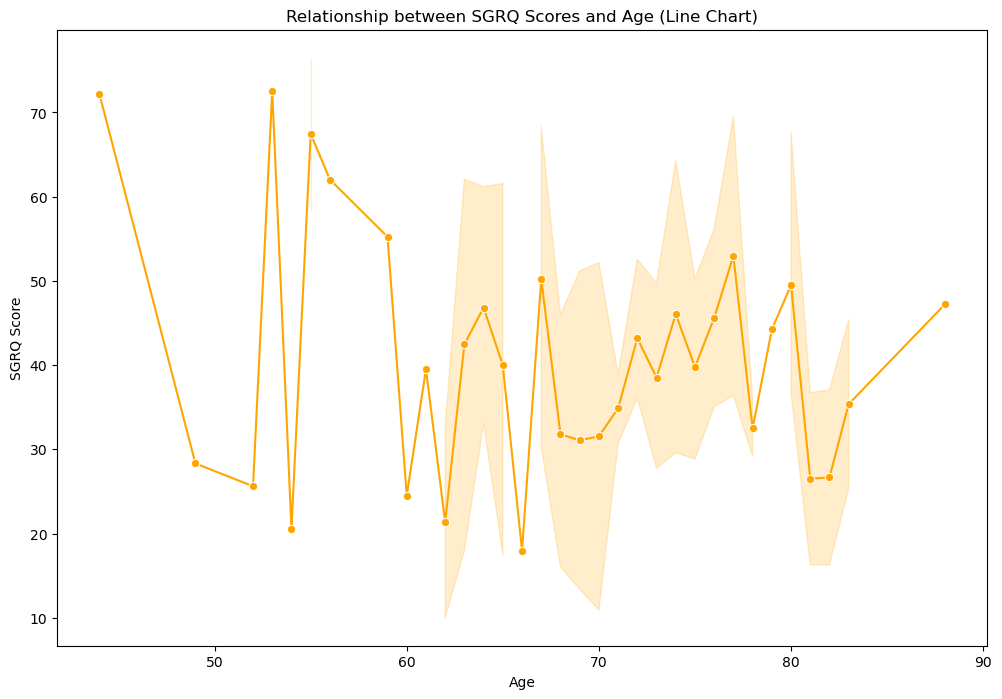

In [177]:
# Relationship between SGRQ Scores and Age - Line Chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='AGE', y='SGRQ', data=df, marker='o', color='orange')
plt.title('Relationship between SGRQ Scores and Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('SGRQ Score')
plt.show()



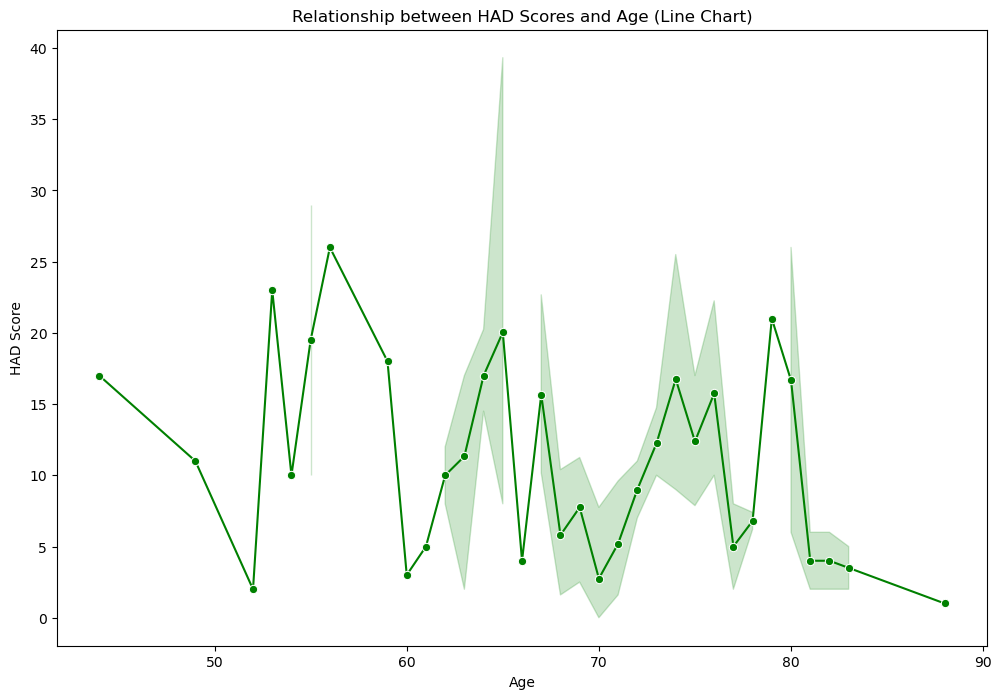

In [178]:
# Relationship between HAD Scores and Age - Line Chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='AGE', y='HAD', data=df, marker='o', color='green')
plt.title('Relationship between HAD Scores and Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('HAD Score')
plt.show()



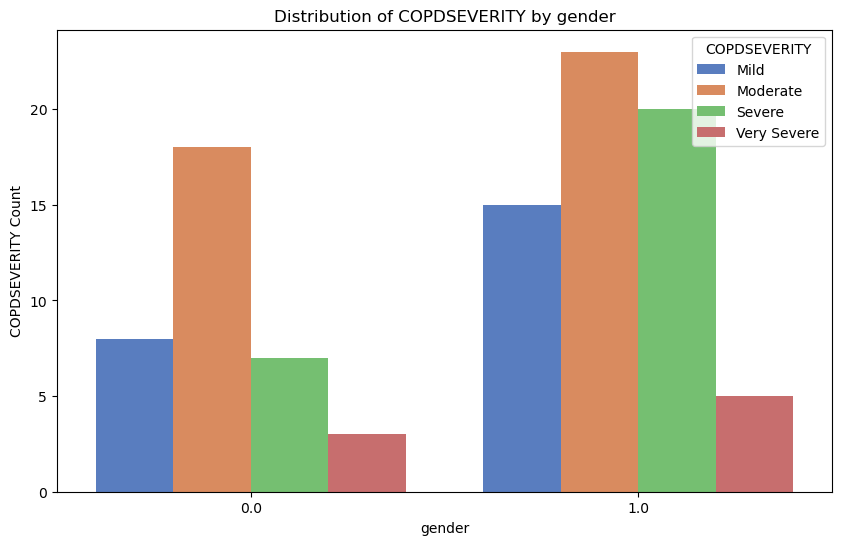

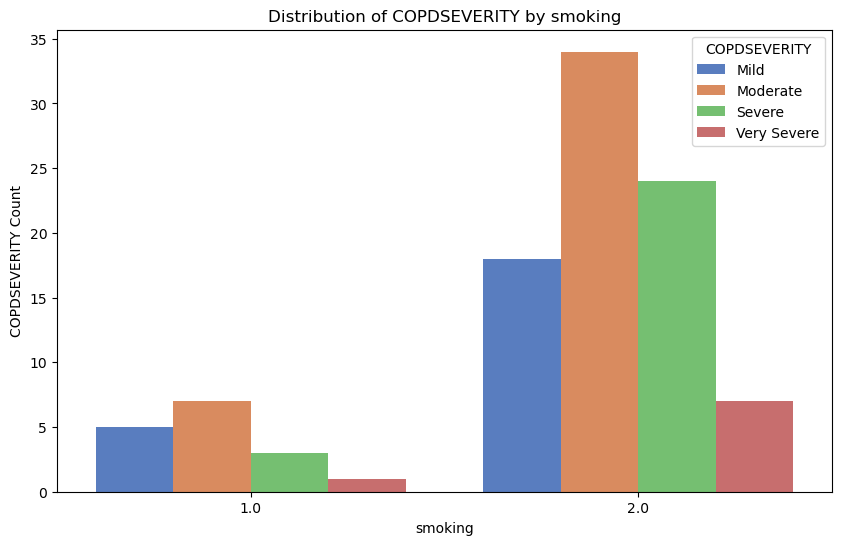

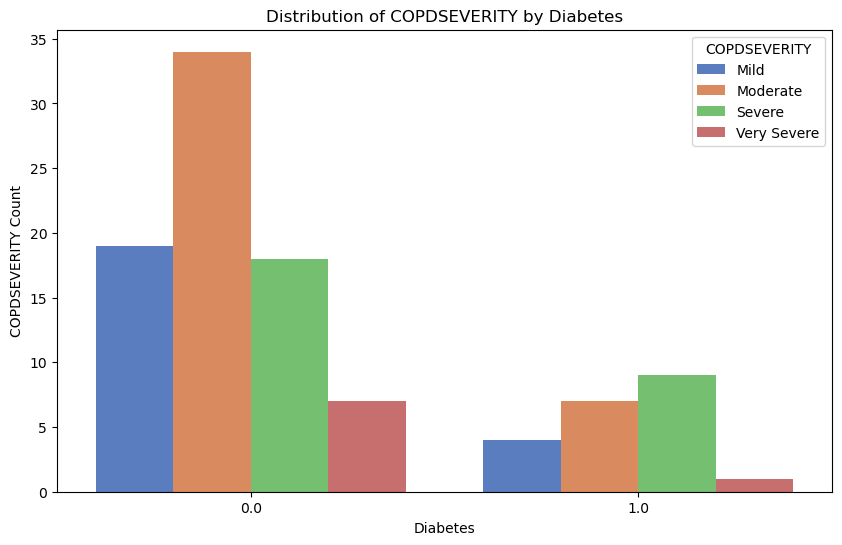

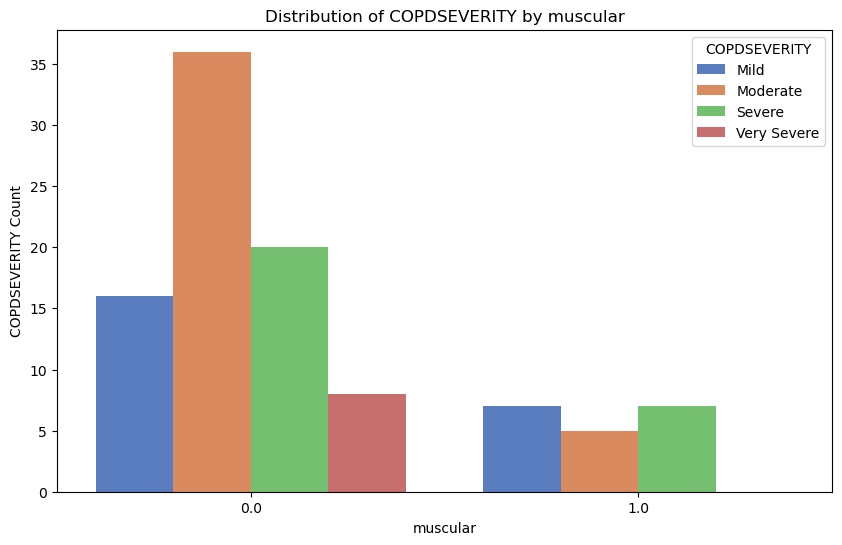

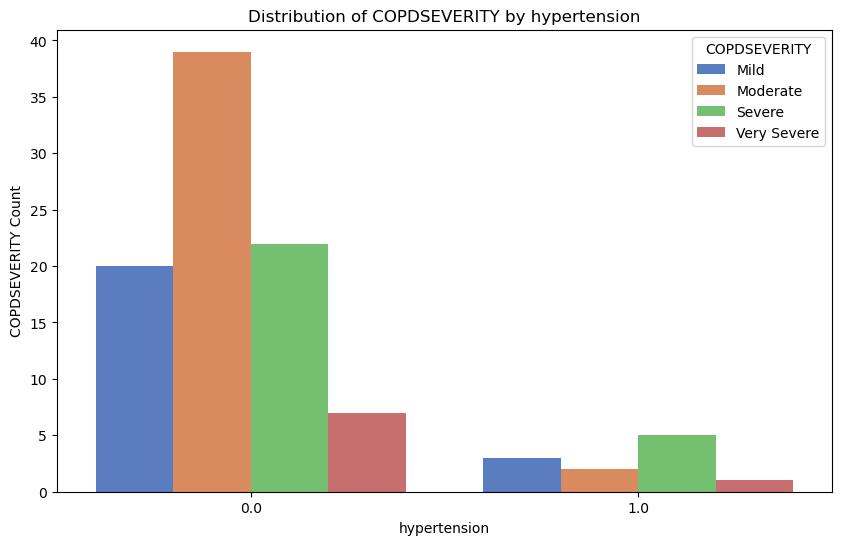

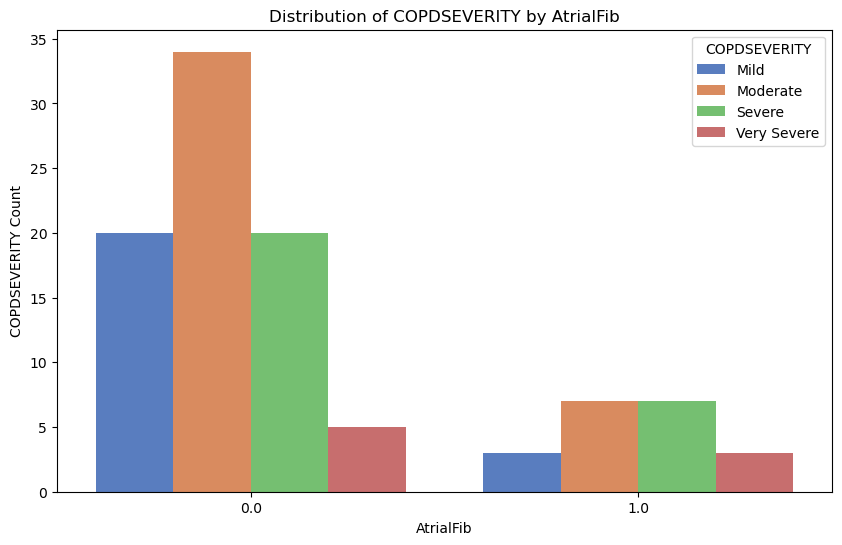

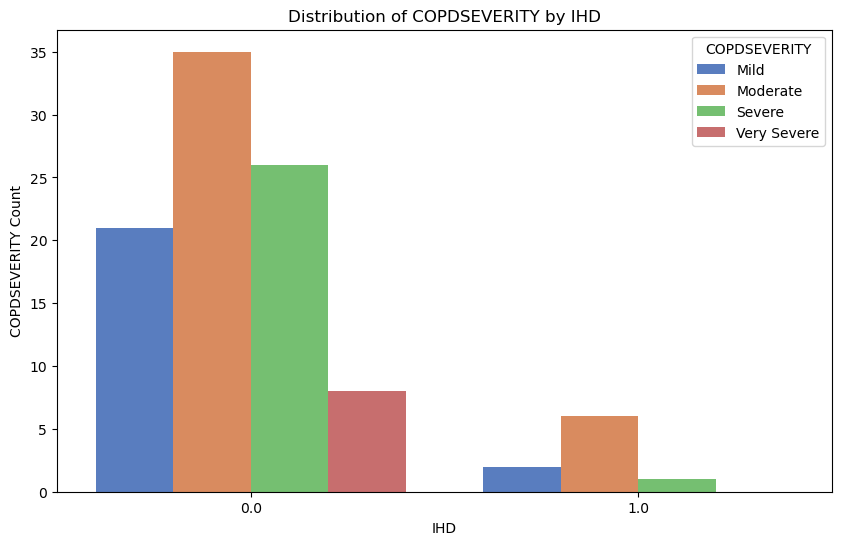

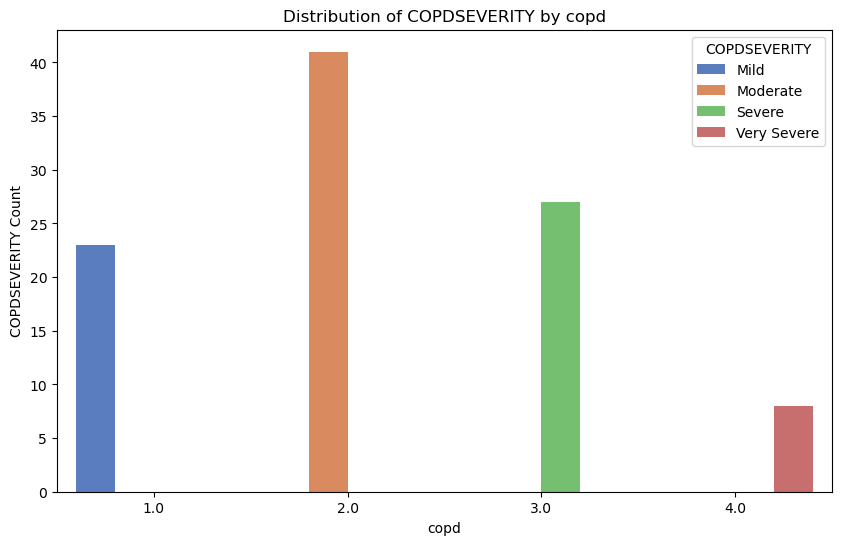

In [179]:
# Distribution of COPDSEVERITY by Categorical Variables
categorical_variables = ['gender', 'smoking', 'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD', 'copd']

for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue='COPDSEVERITY', data=df, palette='muted')
    plt.title(f'Distribution of COPDSEVERITY by {variable}')
    plt.xlabel(variable)
    plt.ylabel('COPDSEVERITY Count')
    plt.legend(title='COPDSEVERITY', loc='upper right', labels=['Mild', 'Moderate', 'Severe', 'Very Severe'])
    plt.show()



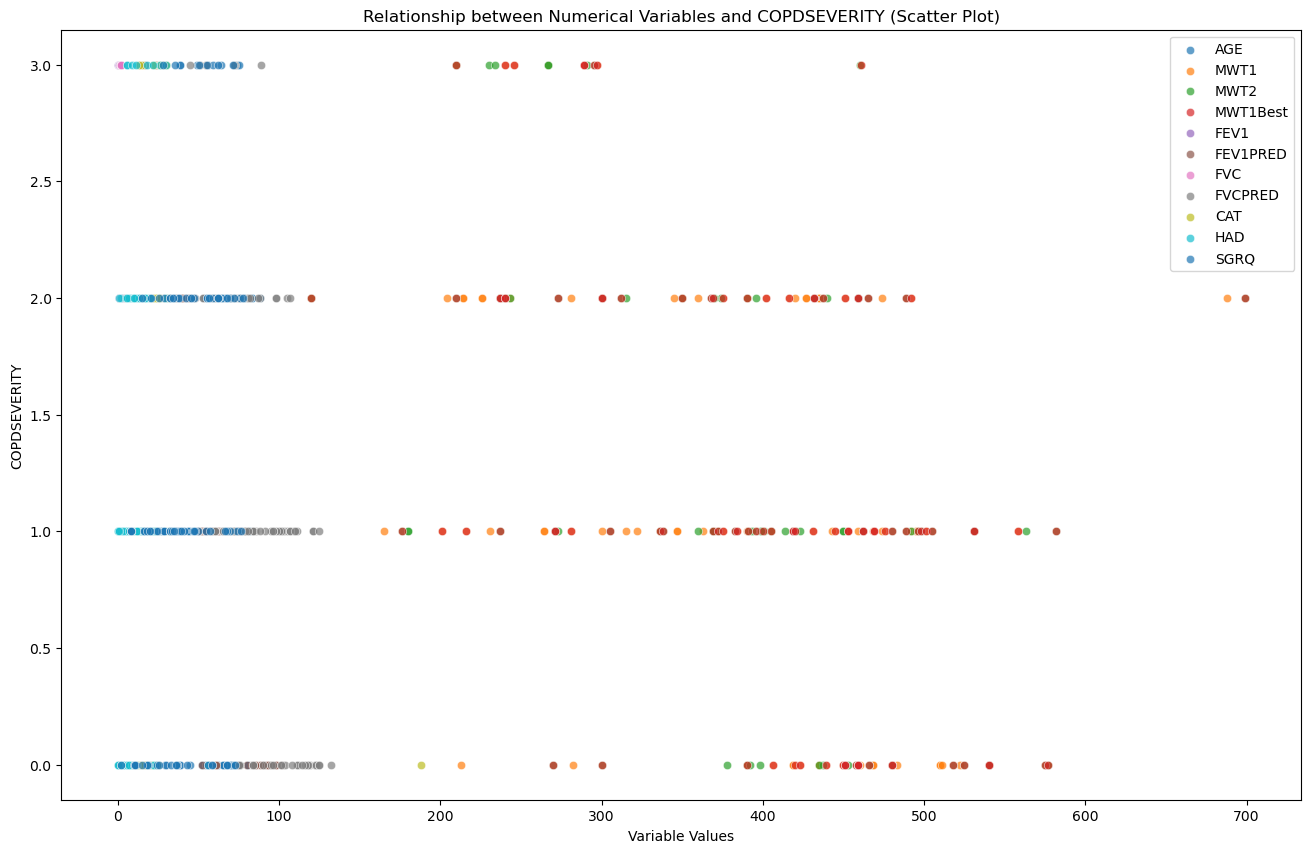

In [180]:
# Scatter Plot
plt.figure(figsize=(16, 10))

for variable in ['AGE', 'MWT1', 'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ']:
    sns.scatterplot(x=variable, y='COPDSEVERITY', data=df, alpha=0.7, label=variable)

plt.title('Relationship between Numerical Variables and COPDSEVERITY (Scatter Plot)')
plt.xlabel('Variable Values')
plt.ylabel('COPDSEVERITY')
plt.legend()
plt.show()

In [181]:
# Names of numerical variables to be categorized
numeric_vars = ['AGE', 'MWT1', 'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ', 'AGEquartiles']

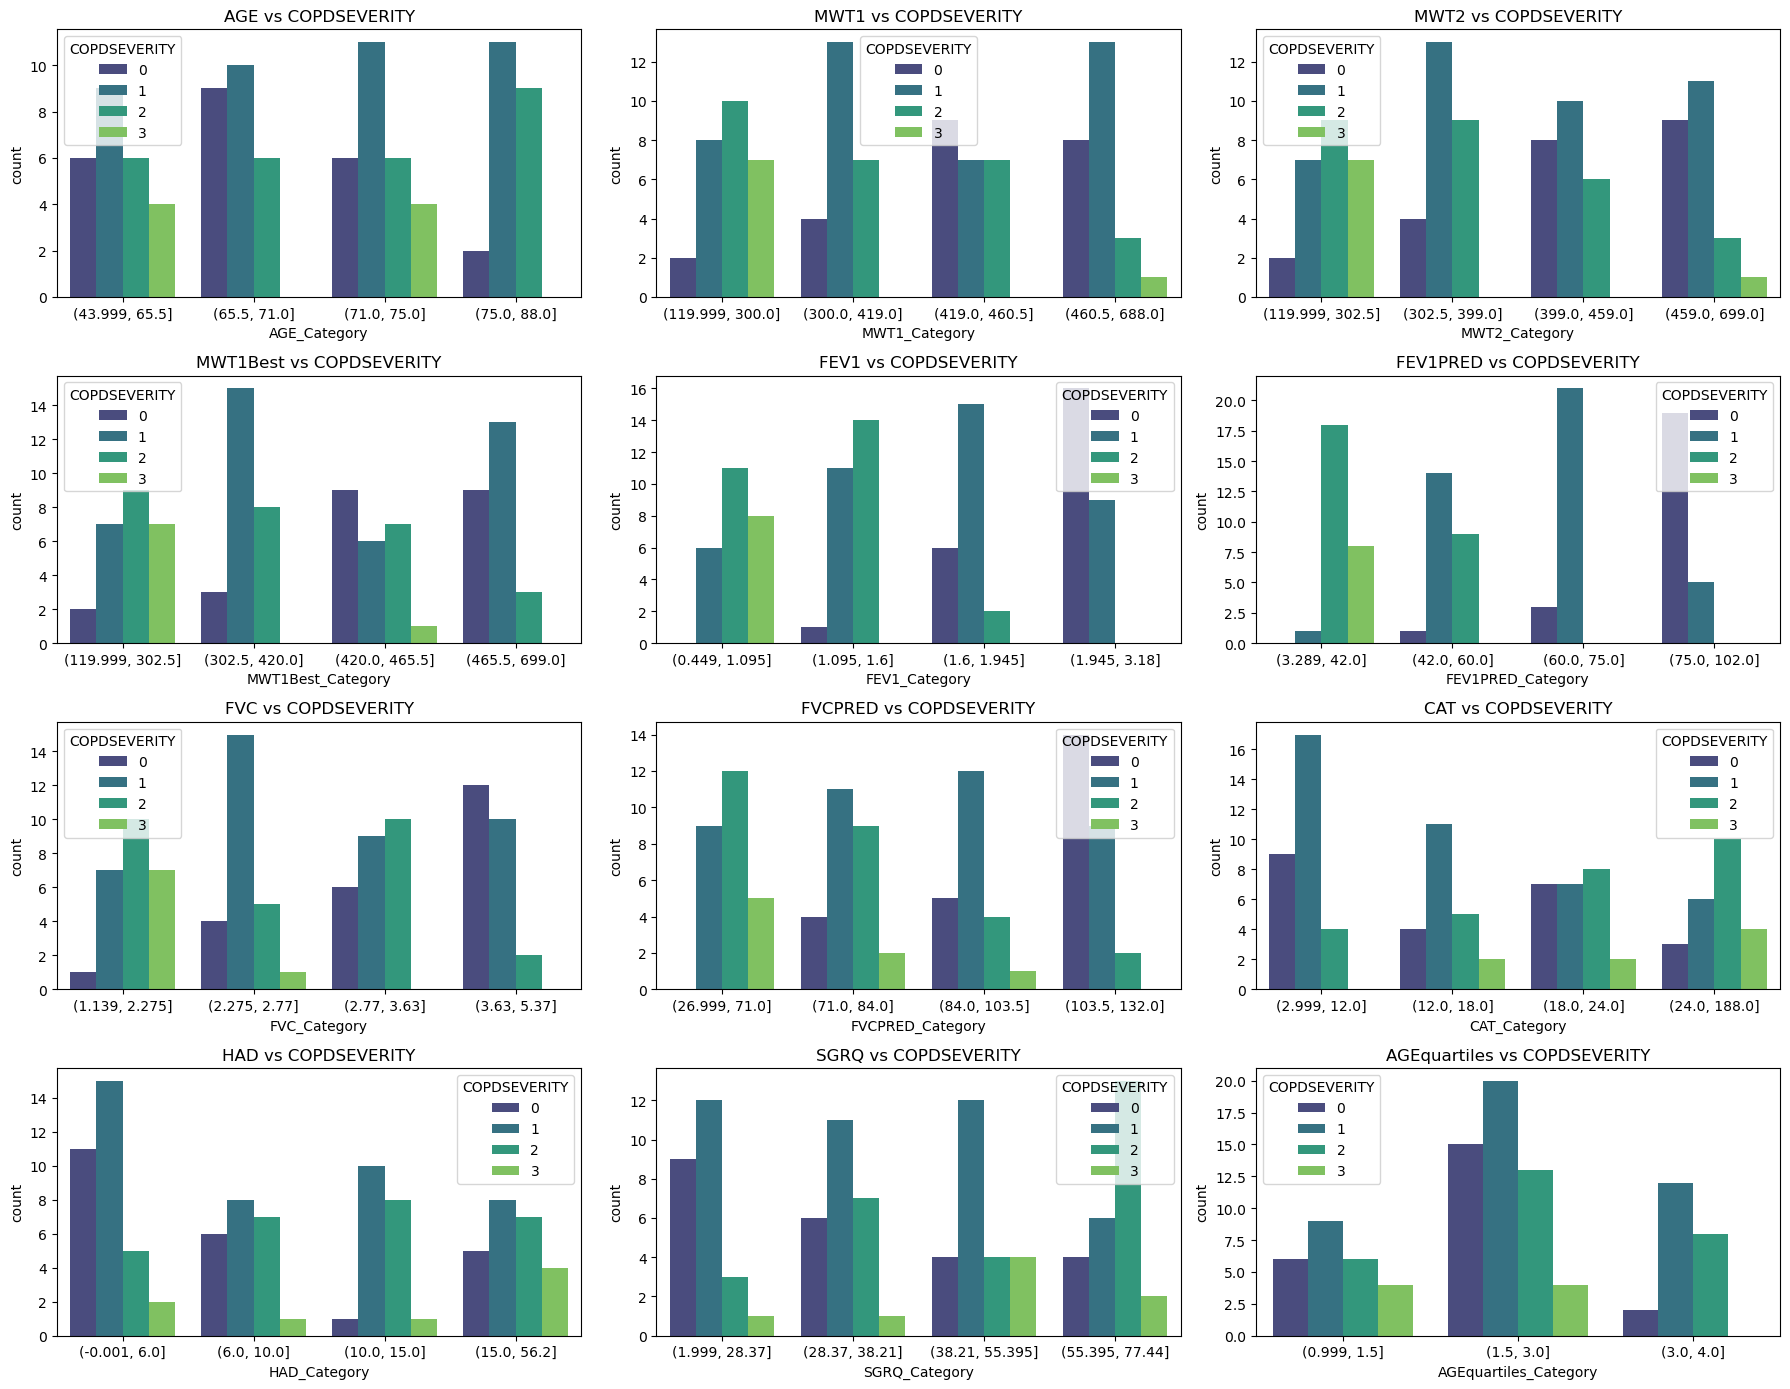

In [182]:
# Set the figure size
plt.figure(figsize=(18, 14))

# For each numerical variable
for i, variable in enumerate(numeric_vars, 1):
    # Categorize the numerical variable (e.g., split into 4 intervals)
    df[f'{variable}_Category'] = pd.qcut(df[variable], q=4, duplicates='drop')

    # Draw a bar plot
    plt.subplot(4, 3, i)
    sns.countplot(x=f'{variable}_Category', hue='COPDSEVERITY', data=df, palette='viridis')
    plt.title(f'{variable} vs COPDSEVERITY')

# Arrange the plots
plt.tight_layout()
plt.show()

In [183]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [184]:
# Prediction on test
dt_predictions = dt_model.predict(X_test)

In [185]:
# Model perform
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Metrics:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [187]:
rf_model = RandomForestClassifier()
ann_model = MLPClassifier()
log_reg_model = LogisticRegression()

In [188]:
# Collect models in a list
models = [rf_model, ann_model, log_reg_model]
model_names = ['Random Forest', 'Artificial Neural Network', 'Logistic Regression']

In [189]:
# Calculate cross-validation scores for each model
cv_scores = []
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores)


C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\linear_model\_logisti

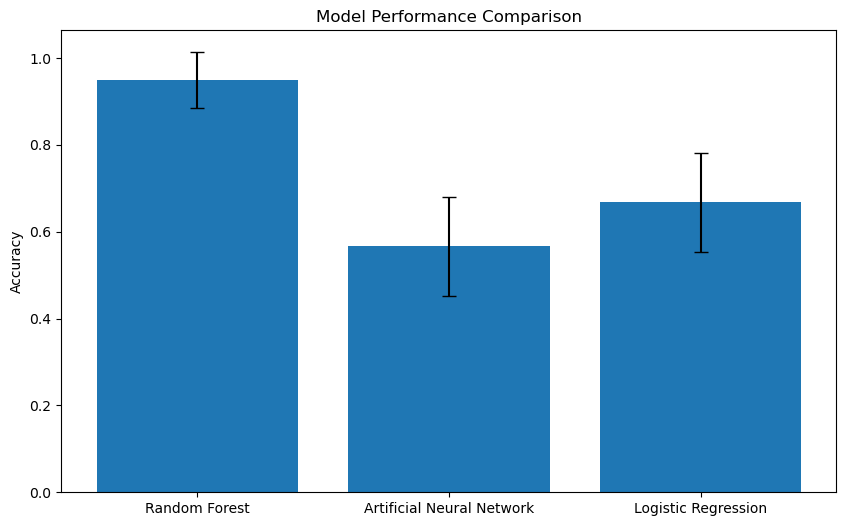

In [190]:
# Visualize with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, [score.mean() for score in cv_scores], yerr=[score.std() for score in cv_scores], capsize=5)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()
